This Notebook is just a playground to create plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

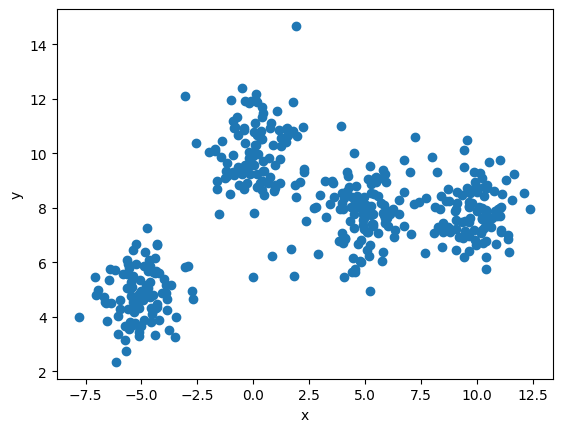

In [2]:
np.random.seed(0)

n = 100

x1 = np.random.normal(0, 1, n)
y1 = np.random.normal(10, 1, n)

x2 = np.random.normal(-5, 1, n)
y2 = np.random.normal(5, 1, n)

x3 = np.random.normal(5, 1, n)
y3 = np.random.normal(8, 1, n)

x4 = np.random.normal(10, 1, n)
y4 = np.random.normal(8, 1, n)

x5 = np.random.normal(2, 3, n//5)
y5 = np.random.normal(8, 3, n//5)

df = pd.DataFrame({
    'x': np.concatenate([x1, x2, x3, x4, x5]),
    'y': np.concatenate([y1, y2, y3, y4, y5])
})

plt.scatter(df['x'], df['y'])

plt.xlabel('x')
plt.ylabel('y')

c:\Users\nicol\Documents\Dev\ml2-semester8\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


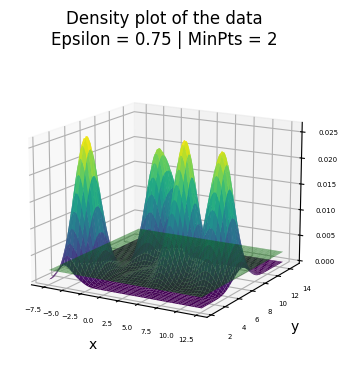

In [3]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(df)
density = np.exp(kde.score_samples(df))

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(df['x'].min(), df['x'].max(), 100)
y = np.linspace(df['y'].min(), df['y'].max(), 100)
X, Y = np.meshgrid(x, y)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.exp(kde.score_samples(positions.T)).reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap='viridis')

# ax.plot_surface(X, Y, 0.02 * np.ones_like(Z), alpha=0.5, color='blue')
# ax.plot_surface(X, Y, 0.01 * np.ones_like(Z), alpha=0.5, color='red')
ax.plot_surface(X, Y, 0.002 * np.ones_like(Z), alpha=0.5, color='green')

plt.title('Density plot of the data\nEpsilon = 0.75 | MinPts = 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Density')
ax.tick_params(axis='both', which='major', labelsize=5)

ax.view_init(elev=15)

plt.show()
